# import necessery libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## load the data sets using np.loadtxt

In [2]:
X_train = np.loadtxt("input.csv",delimiter = ',')
Y_train = np.loadtxt("labels.csv",delimiter = ',')

X_test = np.loadtxt("input_test.csv",delimiter = ',')
Y_test = np.loadtxt("labels_test.csv",delimiter = ',')

In [3]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [5]:
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Reshaping data

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


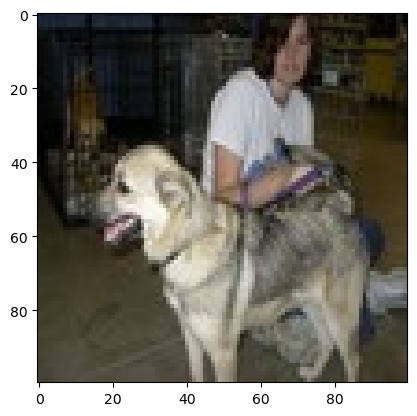

In [7]:
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

## Building model with 3 conv2d layers

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report

history = model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Eğitim sonrası modelin performansını değerlendirin
Y_pred = model.predict(X_test)
Y_pred_classes = (Y_pred > 0.5).astype('int')  # Sigmoid çıkışı olduğu için 0.5 eşik değeri kullanılabilir

# Performans metriklerini hesaplayın
accuracy = accuracy_score(Y_test, Y_pred_classes)
classification_report_result = classification_report(Y_test, Y_pred_classes)

# Performans metriklerini yazdırın
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_report_result)

Epoch 1/10
63/63 [==============================] - 8s 102ms/step - loss: 0.6873 - accuracy: 0.5330
Epoch 2/10
63/63 [==============================] - 6s 101ms/step - loss: 0.6506 - accuracy: 0.6095
Epoch 3/10
63/63 [==============================] - 6s 100ms/step - loss: 0.5981 - accuracy: 0.6715
Epoch 4/10
63/63 [==============================] - 7s 117ms/step - loss: 0.5650 - accuracy: 0.7030
Epoch 5/10
63/63 [==============================] - 8s 126ms/step - loss: 0.5138 - accuracy: 0.7555
Epoch 6/10
63/63 [==============================] - 7s 115ms/step - loss: 0.4487 - accuracy: 0.7855
Epoch 7/10
63/63 [==============================] - 7s 115ms/step - loss: 0.3795 - accuracy: 0.8260
Epoch 8/10
63/63 [==============================] - 7s 112ms/step - loss: 0.2902 - accuracy: 0.8760
Epoch 9/10
63/63 [==============================] - 7s 112ms/step - loss: 0.2202 - accuracy: 0.9185
Epoch 10/10
13/13 [==============================] - 0s 25ms/step
Accuracy: 73.50%
Classification Re

In [15]:
# save the model
model.save("trained_model.keras")

## ploting loss and accuracy charts

In [ ]:
# validation loss

dict_keys(['loss', 'accuracy'])


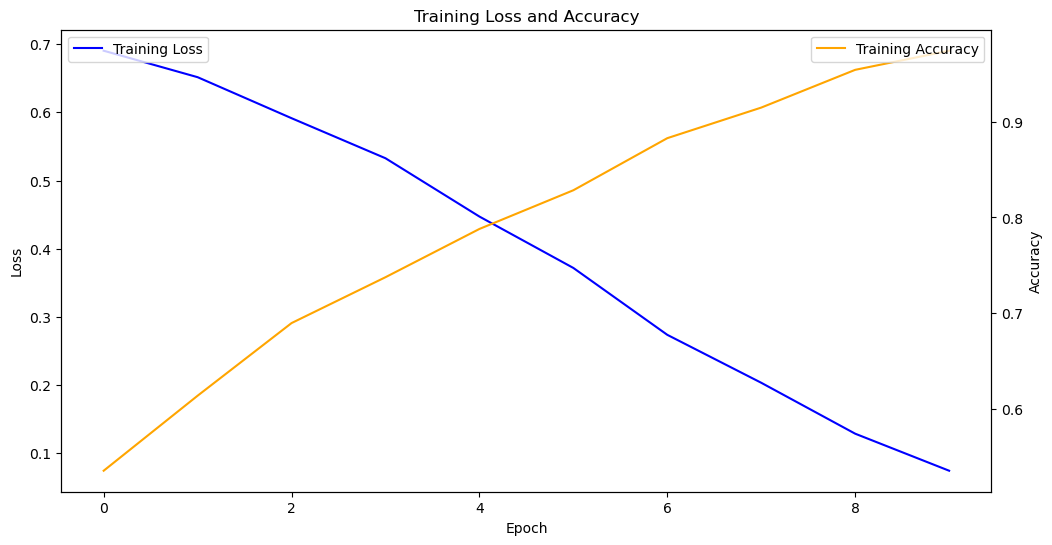

13/13 [==============================] - 0s 22ms/step - loss: 1.5431 - accuracy: 0.6475

Test Loss: 1.5431
Test Accuracy: 64.75%


In [10]:
print(history.history.keys())

plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Create a second y-axis to overlay accuracy
plt2 = plt.gca().twinx()
plt2.plot(history.history['accuracy'], label='Training Accuracy', color='orange')
plt2.set_ylabel('Accuracy')
plt2.legend(loc='upper right')

plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

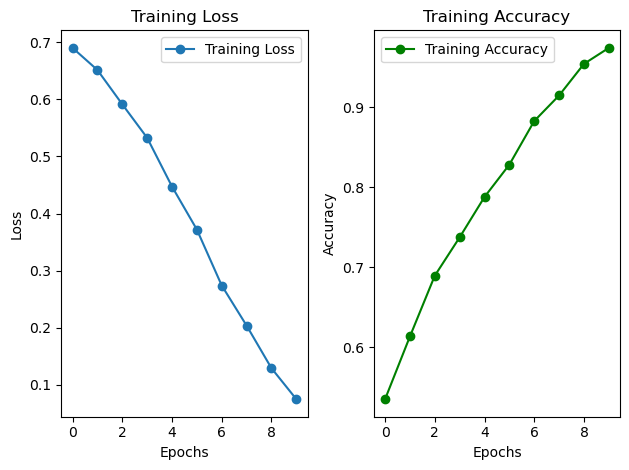

In [8]:
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Testing data from the data itself with random indexed images

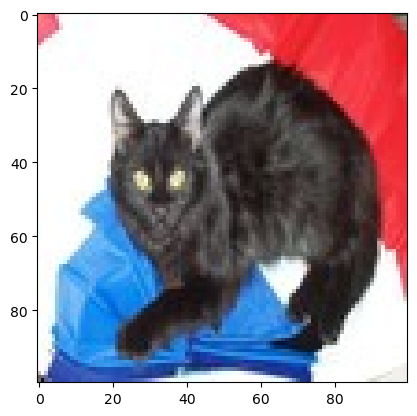

1/1 [==============================] - 0s 16ms/step
model says it is a : cat


In [20]:
idx2 = np.random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("model says it is a :", pred)

## gerekli dosyalar boyut nedeniyle drive'a yüklenmiştir linkleri aşağıda bulabilirsiniz.

https://drive.google.com/drive/folders/1W2DqcT4aWiI41LuBCAydr3fnSGrrlc4V?usp=sharing